<div style="text-align: center; padding: 10px; background-color: #1e1e1e; color: white;">
   <img src="../Input/addthis1200x630.PNG" 
        width="400px" 
        alt="Logo Konrad Lorenz"
        style="margin: 15px auto; display: block;"/>
   <h3 style="margin-top: 10px; color: white;">Fundación Universitaria Konrad Lorenz </h3>
   <hr style="width: 60%; margin: 10px auto; border-color: #555;">
   <div style="font-size: 14px; line-height: 1.5;">
       <p><b>Proyecto:</b> EDA para variables Numéricas VS Categoricas</p>
       <p><b>Autor:</b> Carlos Daniel Amortegui Ferrer</p>
       <p><b>Facultad:</b> Maestría & Especialización en Analítica Estratégica de Datos</p>
       <p><b>Asignatura:</b> Machine Learning Probabilístico</p>
       <p><b>Correo:</b> carlosd.amorteguif@konradlorenz.edu.co </p>
       <p><b>Fecha:</b> 03/02/2025</p>
   </div>
   <hr style="width: 60%; margin: 10px auto; border-color: #555;">
</div>

# **Librerias**

In [1]:
# =============================================================================
# LIBRERÍAS NECESARIAS
# =============================================================================

# Tratamiento de datos
# -----------------------------------------------------------------------------
import numpy as np          # Manejo de arrays y operaciones numéricas eficientes
import pandas as pd         # Manipulación y análisis de datos estructurados
from tabulate import tabulate   # Formateo de tablas para mejor visualización
from scipy import stats

# Gráficos
# -----------------------------------------------------------------------------
import matplotlib.pyplot as plt         # Librería base para visualizaciones
from matplotlib import style           # Estilos para gráficos
import matplotlib.ticker as ticker     # Formateo de ejes en gráficos
import seaborn as sns                 # Visualizaciones estadísticas avanzadas
import statsmodels.api as sm          # Modelos estadísticos y econométricos

# Configuración matplotlib
# -----------------------------------------------------------------------------
plt.rcParams['image.cmap'] = "bwr"    # Configura el mapa de colores predeterminado
plt.rcParams['savefig.bbox'] = "tight"  # Ajusta los márgenes al guardar figuras
style.use('ggplot') or plt.style.use('ggplot')  # Establece estilo visual ggplot

# Configuración warnings
# -----------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')  # Desactiva mensajes de advertencia
# pd.options.display.float_format = '{:.2f}'.format # Suprimir notación cientifica en python

# Lectura de tablas

In [2]:
# Ruta base
ruta_base = r"C:/Users/charl/OneDrive/Documentos/Analítica Estratégica de Datos en la Konrad/Machine Learning Probabilistico/Desarrollos ML/EDA/Output"

# Cargar los archivos
variables_categoricas = pd.read_excel(f"{ruta_base}/variables_categoricas_seleccionadas.xlsx")
variables_numericas = pd.read_excel(f"{ruta_base}/variables_numericas_seleccionadas.xlsx")

In [3]:
variables_categoricas.head()

,aire_acondicionado,desague,calefaccion,consumo_calefacion
0,No,septic,electric,electric
1,No,septic,hot water/steam,gas
2,No,public/commercial,hot water/steam,gas
3,No,septic,hot air,gas
4,Yes,public/commercial,hot air,gas


In [4]:
variables_numericas.head()

,precio,metros_habitables,banyos,precio_terreno,Acres_totales,habitaciones,chimenea,categoria_antiguedad
0,132500,906,1.0,50000,0.09,5,1,Antigua
1,181115,1953,2.5,22300,0.92,6,0,Nueva
2,109000,1944,1.0,7300,0.19,8,1,Antigua
3,155000,1944,1.5,18700,0.41,5,1,Media
4,86060,840,1.0,15000,0.11,3,0,Nueva


In [5]:
print(variables_categoricas.shape)
print(variables_numericas.shape)

(1728, 4)
(1728, 8)


In [6]:
# Combinar los DataFrames
df = pd.concat([variables_numericas, variables_categoricas], axis=1)
df.head()

,precio,metros_habitables,banyos,precio_terreno,Acres_totales,habitaciones,chimenea,categoria_antiguedad,aire_acondicionado,desague,calefaccion,consumo_calefacion
0,132500,906,1.0,50000,0.09,5,1,Antigua,No,septic,electric,electric
1,181115,1953,2.5,22300,0.92,6,0,Nueva,No,septic,hot water/steam,gas
2,109000,1944,1.0,7300,0.19,8,1,Antigua,No,public/commercial,hot water/steam,gas
3,155000,1944,1.5,18700,0.41,5,1,Media,No,septic,hot air,gas
4,86060,840,1.0,15000,0.11,3,0,Nueva,Yes,public/commercial,hot air,gas


# Recodificar la variable chimenea y desague

In [7]:
df['chimenea'] = np.where(df['chimenea'] >= 1, 'Tiene', 'No tiene')

In [8]:
# Reemplazar 'none' por 'septic' en la columna desague
df['desague'] = df['desague'].replace('none', 'septic')

In [9]:
df.head()

,precio,metros_habitables,banyos,precio_terreno,Acres_totales,habitaciones,chimenea,categoria_antiguedad,aire_acondicionado,desague,calefaccion,consumo_calefacion
0,132500,906,1.0,50000,0.09,5,Tiene,Antigua,No,septic,electric,electric
1,181115,1953,2.5,22300,0.92,6,No tiene,Nueva,No,septic,hot water/steam,gas
2,109000,1944,1.0,7300,0.19,8,Tiene,Antigua,No,public/commercial,hot water/steam,gas
3,155000,1944,1.5,18700,0.41,5,Tiene,Media,No,septic,hot air,gas
4,86060,840,1.0,15000,0.11,3,No tiene,Nueva,Yes,public/commercial,hot air,gas


In [10]:
df.desague.value_counts()

desague
public/commercial    1213
septic                515
Name: count, dtype: int64

In [11]:
df.columns

Index(['precio', 'metros_habitables', 'banyos', 'precio_terreno',
       'Acres_totales', 'habitaciones', 'chimenea', 'categoria_antiguedad',
       'aire_acondicionado', 'desague', 'calefaccion', 'consumo_calefacion'],
      dtype='object')

# Graficar Categoricas VS Numéricas

## Chimenea VS precio

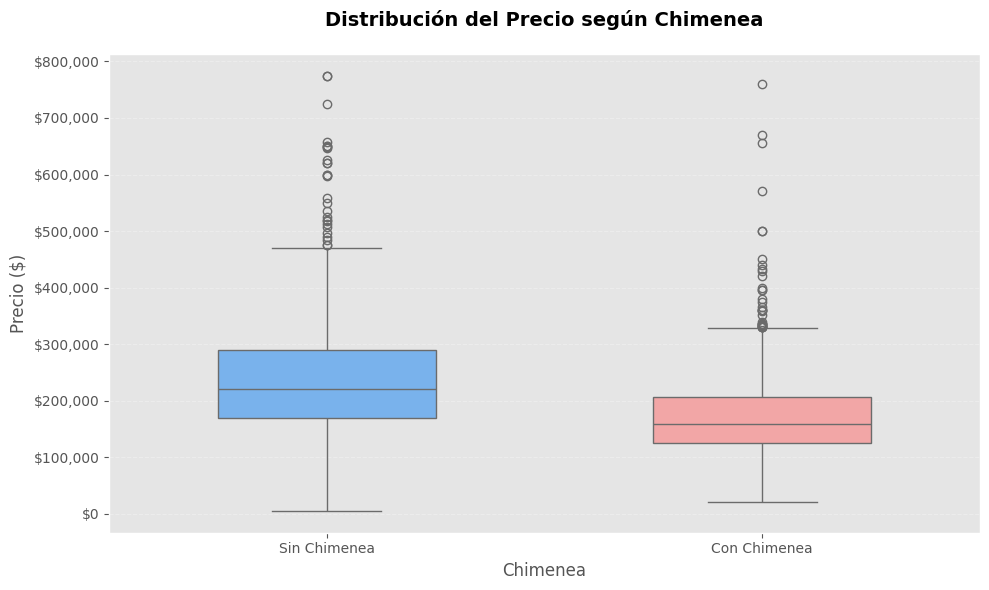

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el box plot con una paleta de dos colores diferentes
sns.boxplot(
    x='chimenea',
    y='precio',
    data=df,
    palette=['#66B2FF', '#FF9999'],  # Azul para "Sin Chimenea", Rosa para "Con Chimenea"
    width=0.5,
    showfliers=True,
    ax=ax
)

# Personalizar el gráfico
ax.set_title('Distribución del Precio según Chimenea', 
             fontsize=14, 
             fontweight='bold', 
             pad=20)

# Formatear eje Y para mostrar precios en formato moneda
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Personalizar etiquetas de los ejes
ax.set_xlabel('Chimenea', fontsize=12)
ax.set_ylabel('Precio ($)', fontsize=12)

# Reemplazar valores 0 y 1 por etiquetas más descriptivas
ax.set_xticklabels(['Sin Chimenea', 'Con Chimenea'])

# Añadir grid suave solo en el eje Y
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Ajustar layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Aire acondicionado VS Precio 

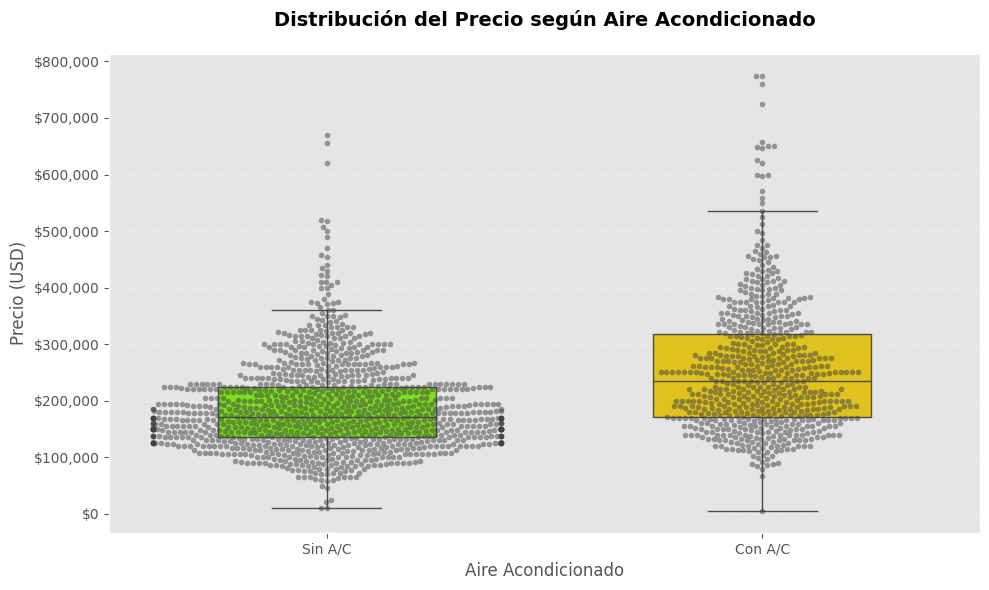

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el box plot con jitter
# Primero el box plot
sns.boxplot(
    x='aire_acondicionado',
    y='precio',
    data=df,
    palette=['#7FFF00', '#FFD700'],
    width=0.5,
    showfliers=False,  # Ocultamos outliers porque los mostraremos con el swarmplot
    ax=ax
)

# Añadir los puntos de dispersión con swarmplot
sns.swarmplot(
    x='aire_acondicionado',
    y='precio',
    data=df,
    color='0.25',  # Color gris oscuro para los puntos
    alpha=0.5,     # Transparencia de los puntos
    size=4,        # Tamaño de los puntos
    ax=ax
)

# Personalizar el gráfico
ax.set_title('Distribución del Precio según Aire Acondicionado', 
             fontsize=14, 
             fontweight='bold', 
             pad=20)

# Formatear eje Y para mostrar precios en formato moneda
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Personalizar etiquetas de los ejes
ax.set_xlabel('Aire Acondicionado', fontsize=12)
ax.set_ylabel('Precio (USD)', fontsize=12)

# Reemplazar valores 0 y 1 por etiquetas más descriptivas
ax.set_xticklabels(['Sin A/C', 'Con A/C'])

# Añadir grid suave solo en el eje Y
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Ajustar layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Desague VS Precio

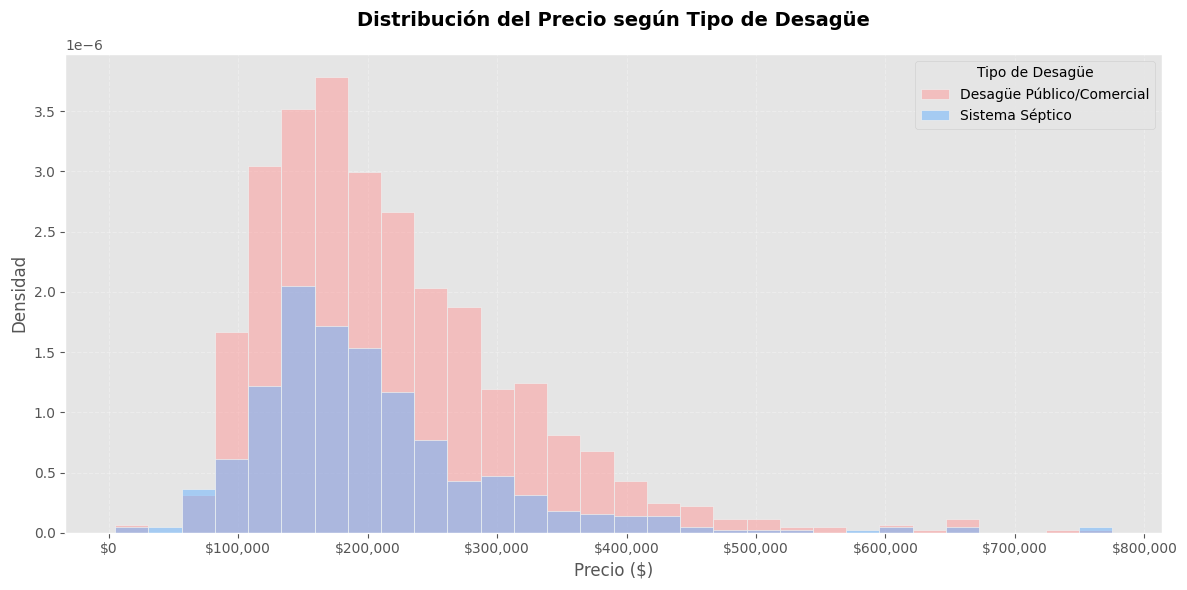

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

# Crear histograma
sns.histplot(
    data=df,
    x='precio',
    hue='desague',
    multiple="layer",
    palette=['#66B2FF', '#FF9999'],
    alpha=0.5,
    bins=30,
    stat='density',
    ax=ax
)

# Personalizar el gráfico
ax.set_title('Distribución del Precio según Tipo de Desagüe', 
             fontsize=14, 
             fontweight='bold', 
             pad=20)

# Formatear eje X para mostrar precios en formato moneda
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Personalizar etiquetas de los ejes
ax.set_xlabel('Precio ($)', fontsize=12)
ax.set_ylabel('Densidad', fontsize=12)

# Personalizar leyenda con las nuevas categorías
legend_labels = ['Desagüe Público/Comercial', 'Sistema Séptico']
ax.legend(title='Tipo de Desagüe', labels=legend_labels)

# Añadir grid suave
ax.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Ajustar layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## calefaccion VS precio 

<Figure size 1200x800 with 0 Axes>

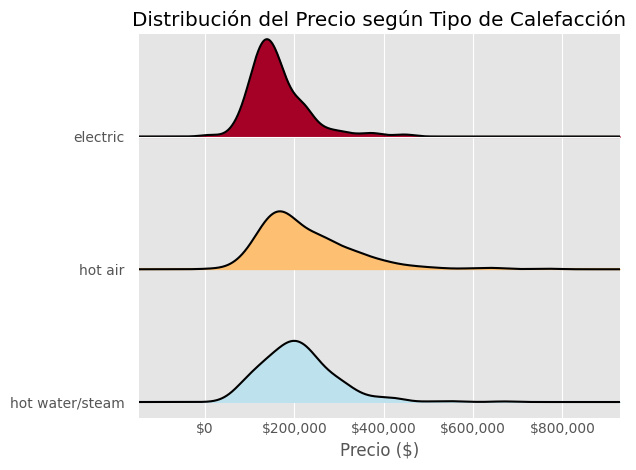

In [15]:
import joypy # Nueav libreria

plt.figure(figsize=(12, 8))

# Crear el joy plot
joypy.joyplot(
    data=df,
    by='calefaccion',
    column='precio',
    colormap=plt.cm.RdYlBu,  # Usamos un mapa de colores predefinido en lugar de lista
    title="Distribución del Precio según Tipo de Calefacción",
    range_style='all',
    tails=0.2,
    overlap=0.7,
    grid=True
)

# Formatear el eje x para mostrar precios en formato moneda
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in current_values])

# Ajustar título y etiquetas
plt.xlabel('Precio ($)')

# Ajustar layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# consumo_calefacion VS Precio  - barplot precio promedio 

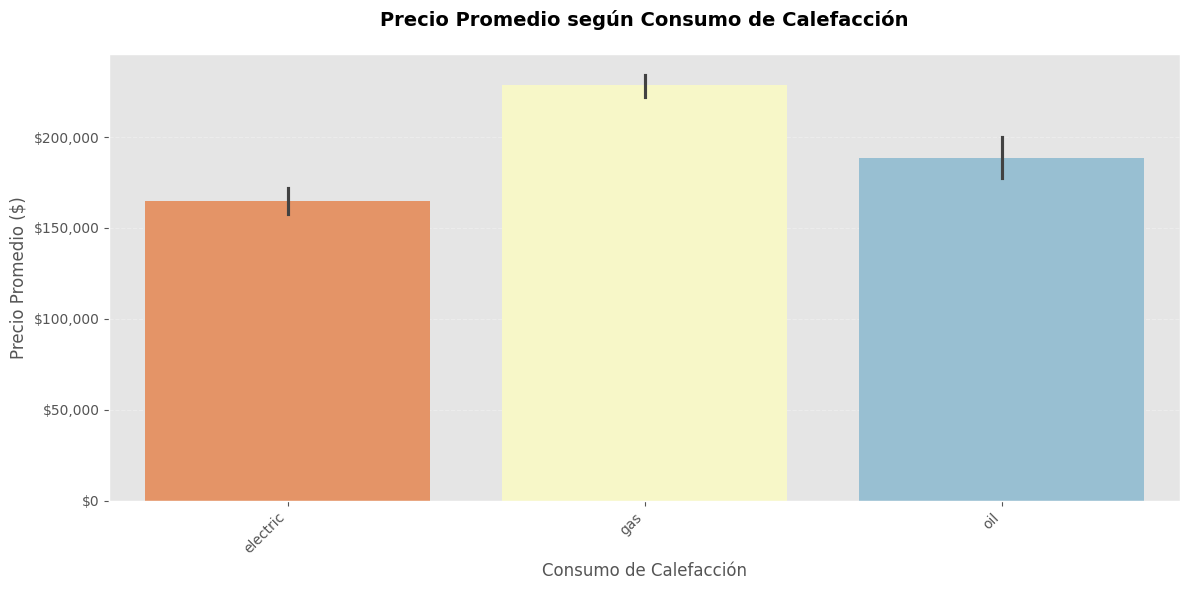

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el bar plot
sns.barplot(
    x='consumo_calefacion',
    y='precio',
    data=df,
    palette='RdYlBu',  # Paleta de colores que va del rojo al azul
    ci=95,  # Intervalo de confianza del 95%
    ax=ax
)

# Personalizar el gráfico
ax.set_title('Precio Promedio según Consumo de Calefacción', 
             fontsize=14, 
             fontweight='bold', 
             pad=20)

# Formatear eje Y para mostrar precios en formato moneda
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Personalizar etiquetas de los ejes
ax.set_xlabel('Consumo de Calefacción', fontsize=12)
ax.set_ylabel('Precio Promedio ($)', fontsize=12)

# Rotar etiquetas del eje X si son largas
plt.xticks(rotation=45, ha='right')

# Añadir grid suave
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Ajustar layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Todas las variables categoricas VS Precio

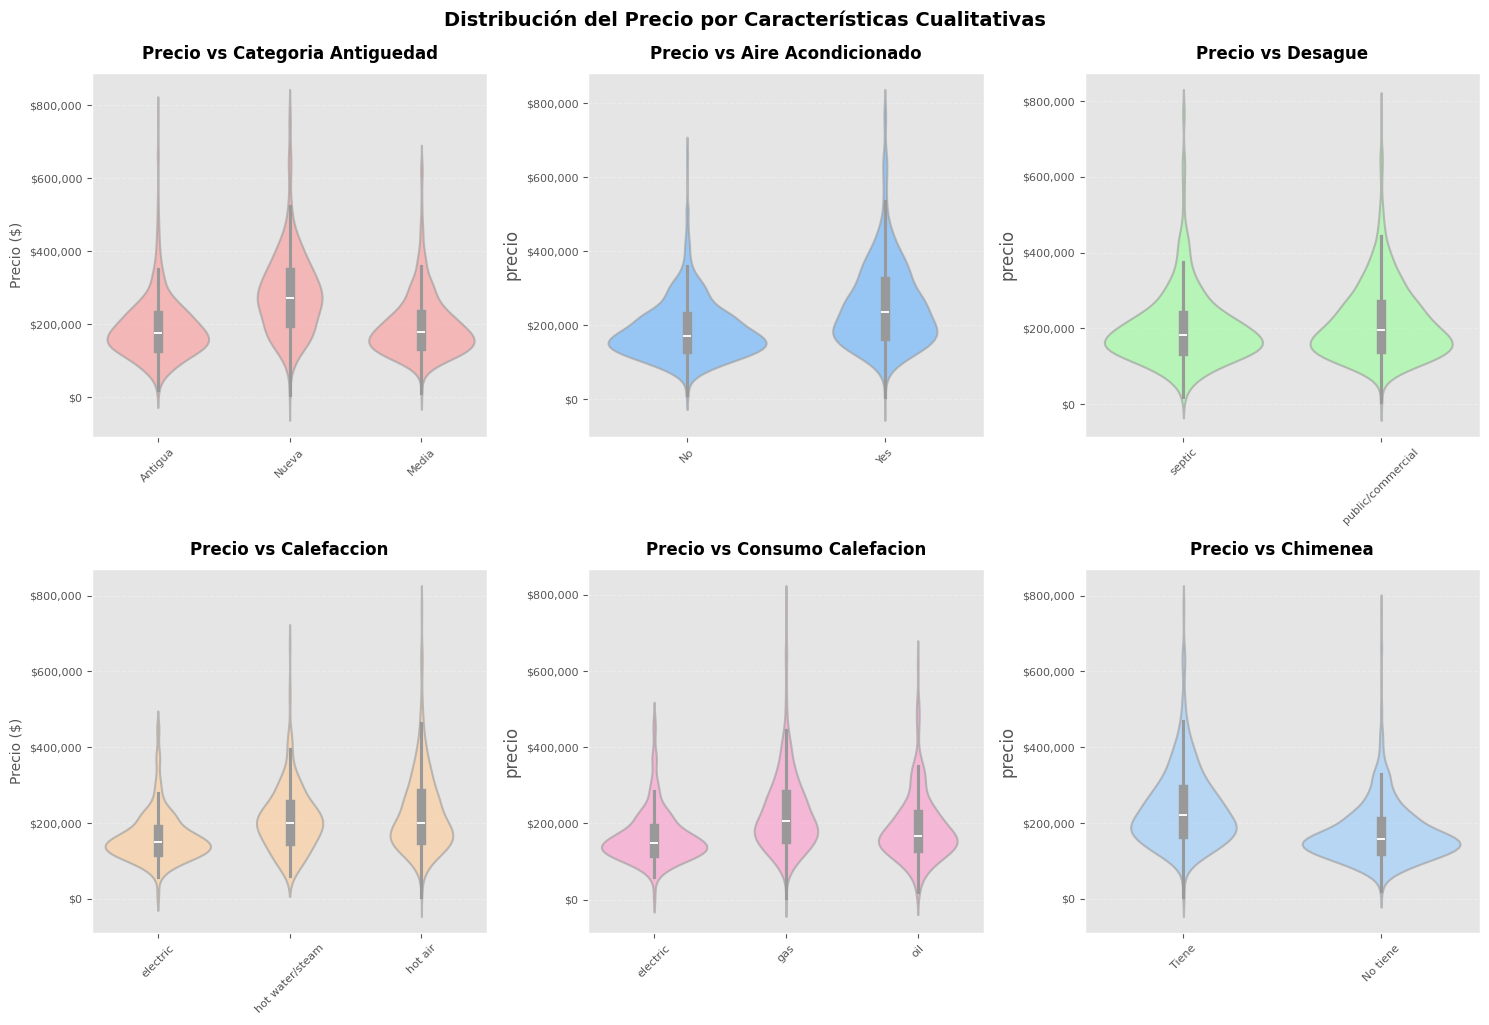

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Seleccionar variables categóricas
columnas_object = ['categoria_antiguedad', 'aire_acondicionado', 'desague', 
                 'calefaccion', 'consumo_calefacion', 'chimenea']

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flat

# Paleta de colores personalizada
colores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']

# Crear los violin plots
for i, columna in enumerate(columnas_object):
   # Crear violin plot
   sns.violinplot(
       x=columna,
       y='precio',
       data=df,
       ax=axes[i],
       color='white',
       inner='box',
       linewidth=1.5,
       saturation=0.7
   )
   
   # Personalizar cada subplot
   axes[i].set_title(f'Precio vs {columna.replace("_", " ").title()}', 
                    fontsize=12, 
                    fontweight='bold',
                    pad=10)
   
   # Formatear eje Y para mostrar precios en miles
   axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))
   
   # Rotar etiquetas del eje X
   axes[i].tick_params(axis='x', rotation=45, labelsize=8)
   axes[i].tick_params(axis='y', labelsize=8)
   
   # Añadir grid suave solo en el eje Y
   axes[i].yaxis.grid(True, linestyle='--', alpha=0.3)
   axes[i].set_axisbelow(True)
   
   # Personalizar colores
   violins = axes[i].collections
   for violin in violins:
       violin.set_facecolor(colores[i])
       violin.set_alpha(0.6)
   
   # Etiquetas
   axes[i].set_xlabel('')
   if i % 3 == 0:  
       axes[i].set_ylabel('Precio ($)', fontsize=10)

# Ajustar layout
plt.tight_layout()

# Título general
fig.suptitle('Distribución del Precio por Características Cualitativas', 
            fontsize=14, 
            fontweight='bold', 
            y=1.02)

# Mostrar el gráfico
plt.show()

# Recodificación de Variables para modelado

In [18]:
df.head()

,precio,metros_habitables,banyos,precio_terreno,Acres_totales,habitaciones,chimenea,categoria_antiguedad,aire_acondicionado,desague,calefaccion,consumo_calefacion
0,132500,906,1.0,50000,0.09,5,Tiene,Antigua,No,septic,electric,electric
1,181115,1953,2.5,22300,0.92,6,No tiene,Nueva,No,septic,hot water/steam,gas
2,109000,1944,1.0,7300,0.19,8,Tiene,Antigua,No,public/commercial,hot water/steam,gas
3,155000,1944,1.5,18700,0.41,5,Tiene,Media,No,septic,hot air,gas
4,86060,840,1.0,15000,0.11,3,No tiene,Nueva,Yes,public/commercial,hot air,gas


In [19]:
df.dtypes

precio                    int64
metros_habitables         int64
banyos                  float64
precio_terreno            int64
Acres_totales           float64
habitaciones              int64
chimenea                 object
categoria_antiguedad     object
aire_acondicionado       object
desague                  object
calefaccion              object
consumo_calefacion       object
dtype: object

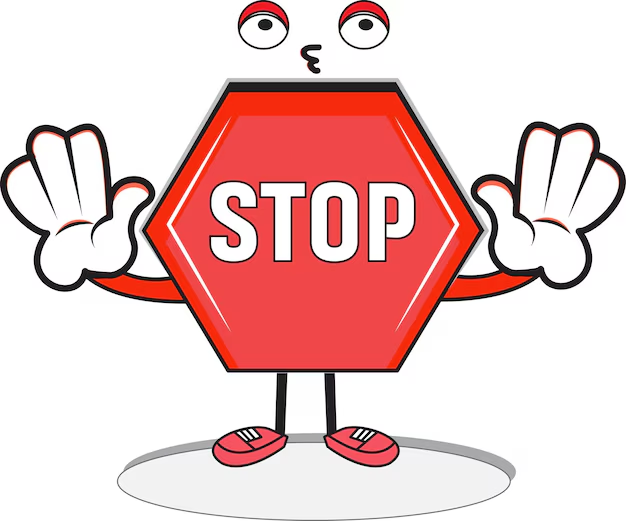

# **Es hora de Hablar sobre Validación de Modelos, Escalado de Variables y Tranformación de varaibles categóricas**

__________________________________________________

******************************

____________________________

_________________________________

___________________________________________________________

_____________________________________

______________________________

________________________________________

__________________________________

____________________________

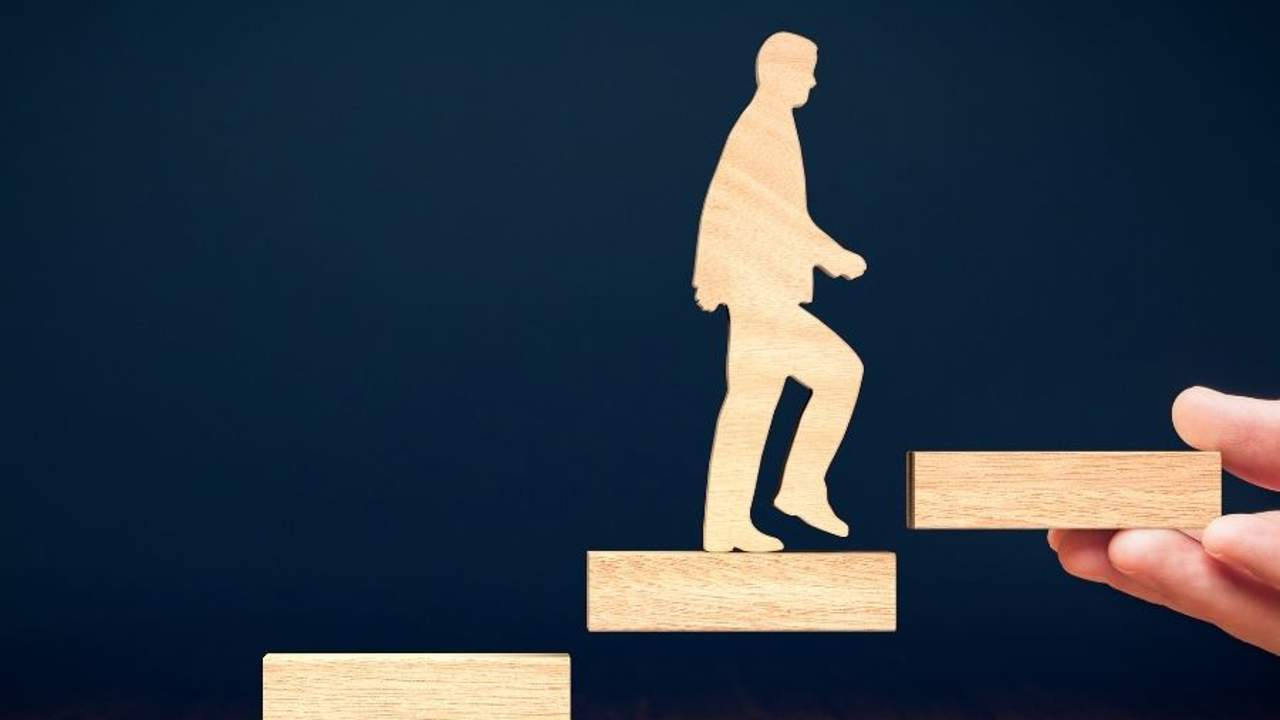

# **Sigamos** 

# Entrenamiento y testeo

### Reparto de datos en entrenamiento y prueba

En esta etapa, separamos los datos en dos conjuntos: **train** (entrenamiento) y **test** (prueba). Esta división es esencial para evaluar el rendimiento del modelo y prevenir el sobreajuste (**overfitting**).

#### **¿Por qué es importante dividir los datos?**
1. **Entrenamiento del modelo:**  
   El conjunto de entrenamiento se utiliza para que el modelo aprenda los patrones y relaciones en los datos.

2. **Evaluación del modelo:**  
   El conjunto de prueba permite medir qué tan bien el modelo generaliza a datos nuevos, garantizando que el rendimiento del modelo no sea únicamente válido para los datos ya conocidos.

3. **Evitar el sobreajuste:**  
   Si no se realiza esta división, es posible que el modelo memorice los datos de entrenamiento, lo que llevaría a un mal rendimiento cuando se enfrente a datos desconocidos.

---

#### **División de los datos con `train_test_split`**

Utilizamos el siguiente comando para realizar la partición de los datos:

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('precio', axis='columns'),
    df['precio'],
    train_size=0.8,
    random_state=1234,
    shuffle=True
)



* df.drop('precio', axis='columns'): Se eliminan los valores de la variable objetivo (precio) del conjunto de características.

* df['precio']: Se selecciona la variable objetivo que queremos predecir.

* train_size=0.8: Define que el 80% de los datos se utilizará para entrenamiento y el 20% restante para prueba.

* random_state=1234: Establece una semilla aleatoria para que la partición de datos sea reproducible.

* shuffle=True: Indica que los datos se deben mezclar antes de dividirlos, lo que ayuda a mejorar la representatividad de ambos conjuntos.

In [20]:
df

,precio,metros_habitables,banyos,precio_terreno,Acres_totales,habitaciones,chimenea,categoria_antiguedad,aire_acondicionado,desague,calefaccion,consumo_calefacion
0,132500,906,1.0,50000,0.09,5,Tiene,Antigua,No,septic,electric,electric
1,181115,1953,2.5,22300,0.92,6,No tiene,Nueva,No,septic,hot water/steam,gas
2,109000,1944,1.0,7300,0.19,8,Tiene,Antigua,No,public/commercial,hot water/steam,gas
3,155000,1944,1.5,18700,0.41,5,Tiene,Media,No,septic,hot air,gas
4,86060,840,1.0,15000,0.11,3,No tiene,Nueva,Yes,public/commercial,hot air,gas
...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,2310,2.5,24200,0.38,11,Tiene,Antigua,No,public/commercial,hot water/steam,gas
1724,285000,2564,2.5,36200,0.94,11,Tiene,Antigua,No,public/commercial,hot water/steam,gas
1725,194900,1099,1.0,20400,0.39,3,No tiene,Nueva,No,public/commercial,hot air,gas
1726,125000,1225,1.0,16800,0.24,7,Tiene,Antigua,No,public/commercial,hot air,gas


In [21]:
df.shape

(1728, 12)

In [22]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('precio', axis = 'columns'),
                                        df['precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [23]:
X_train

,metros_habitables,banyos,precio_terreno,Acres_totales,habitaciones,chimenea,categoria_antiguedad,aire_acondicionado,desague,calefaccion,consumo_calefacion
1571,2576,2.5,27400,0.46,12,Tiene,Antigua,No,public/commercial,hot water/steam,gas
832,1877,3.0,24500,0.37,10,Tiene,Media,No,public/commercial,hot air,gas
1302,1716,2.0,3000,0.55,6,No tiene,Media,Yes,septic,hot air,oil
1068,1914,1.5,29400,0.42,5,Tiene,Antigua,No,public/commercial,hot air,gas
535,2057,2.5,36000,0.15,9,Tiene,Nueva,Yes,public/commercial,hot air,gas
...,...,...,...,...,...,...,...,...,...,...,...
1228,1216,2.0,25600,0.04,4,Tiene,Media,Yes,public/commercial,hot air,gas
1077,1480,1.5,17600,0.09,8,No tiene,Media,Yes,public/commercial,electric,electric
1318,1328,2.5,24200,0.44,8,Tiene,Nueva,No,public/commercial,hot air,gas
723,2300,3.0,46600,0.06,10,Tiene,Media,Yes,public/commercial,hot air,gas


In [24]:
X_test

,metros_habitables,banyos,precio_terreno,Acres_totales,habitaciones,chimenea,categoria_antiguedad,aire_acondicionado,desague,calefaccion,consumo_calefacion
903,912,1.5,15700,0.16,3,No tiene,Media,No,public/commercial,electric,electric
208,1492,2.5,15100,0.17,8,No tiene,Media,No,public/commercial,electric,electric
358,1480,1.5,17200,0.08,5,Tiene,Media,Yes,public/commercial,hot air,gas
1187,1056,2.0,19500,0.61,4,No tiene,Nueva,No,septic,hot water/steam,oil
319,2110,2.5,11600,0.33,8,Tiene,Nueva,Yes,public/commercial,hot air,gas
...,...,...,...,...,...,...,...,...,...,...,...
1010,1700,2.5,35800,0.29,6,Tiene,Nueva,Yes,public/commercial,hot air,gas
198,1140,2.0,22000,0.28,6,Tiene,Media,Yes,public/commercial,hot air,gas
443,1604,2.5,15700,0.46,4,Tiene,Media,Yes,septic,hot air,oil
1427,2012,3.0,27000,0.33,6,Tiene,Media,No,public/commercial,electric,electric


In [25]:
y_train

1571    315000
832     225000
1302    209000
1068    205000
535     188095
         ...  
1228    203000
1077    143000
1318    229900
723     374900
815     159000
Name: precio, Length: 1382, dtype: int64

In [26]:
y_test

903     105000
208     113000
358     110500
1187    159000
319     215000
         ...  
1010      5000
198     125000
443     189100
1427    255000
1425    273495
Name: precio, Length: 346, dtype: int64

In [ ]:
X_train

### Validación de la distribución en los conjuntos de entrenamiento y prueba

Una vez que se realiza la división de los datos, es crucial validar que la distribución de los datos en los conjuntos de **entrenamiento** y **prueba** sea similar. Esto garantiza que ambos conjuntos sean representativos del comportamiento general de la variable objetivo (*precio* en este caso). Si las distribuciones difieren demasiado, es posible que el modelo no pueda generalizar correctamente.

#### **¿Por qué es importante validar la distribución?**
1. **Generalización del modelo:**  
   Si la distribución del conjunto de entrenamiento difiere significativamente de la del conjunto de prueba, el modelo puede aprender patrones que no reflejan correctamente los datos nuevos, lo que lleva a un mal rendimiento.

2. **Evitar sesgos en el modelo:**  
   Una diferencia en la distribución puede generar sesgos, haciendo que el modelo se adapte únicamente a los datos de entrenamiento.

3. **Consistencia en la evaluación:**  
   Al asegurar una distribución similar, la evaluación del modelo será más confiable, ya que los resultados obtenidos en el conjunto de prueba reflejarán con mayor precisión el rendimiento esperado en un entorno de producción.



In [27]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count      1382.000000
mean     211436.516643
std       96846.639129
min       10300.000000
25%      145625.000000
50%      190000.000000
75%      255000.000000
max      775000.000000
Name: precio, dtype: float64


In [28]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count       346.000000
mean     214084.395954
std      104689.155889
min        5000.000000
25%      139000.000000
50%      180750.000000
75%      271750.000000
max      670000.000000
Name: precio, dtype: float64


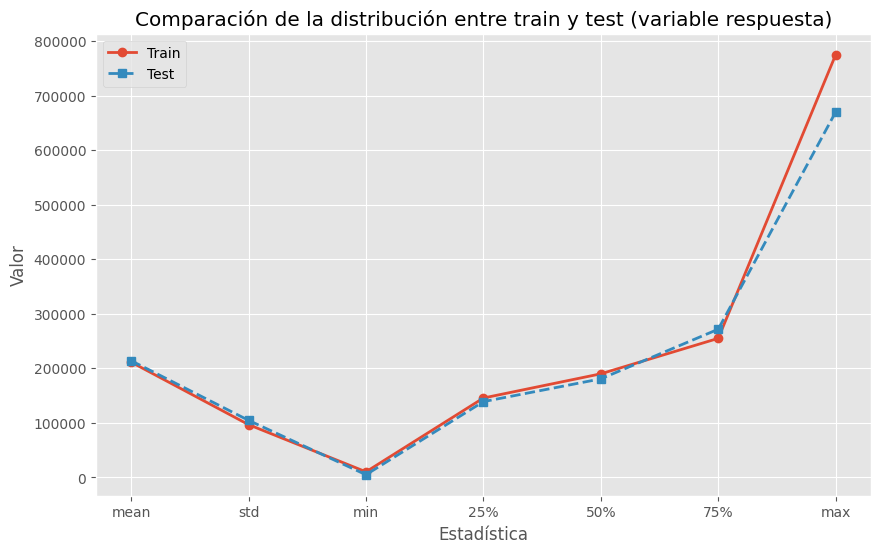

In [29]:
import matplotlib.pyplot as plt

# Calcular estadísticas descriptivas
y_train_stats = y_train.describe()
y_test_stats = y_test.describe()

# Extraer las estadísticas clave para la gráfica
categories = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
y_train_values = [y_train_stats[stat] for stat in categories]
y_test_values = [y_test_stats[stat] for stat in categories]

# Crear una gráfica comparativa
plt.figure(figsize=(10, 6))
plt.plot(categories, y_train_values, marker='o', label='Train', linestyle='-', linewidth=2)
plt.plot(categories, y_test_values, marker='s', label='Test', linestyle='--', linewidth=2)

# Configurar detalles de la gráfica
plt.title('Comparación de la distribución entre train y test (variable respuesta)')
plt.xlabel('Estadística')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

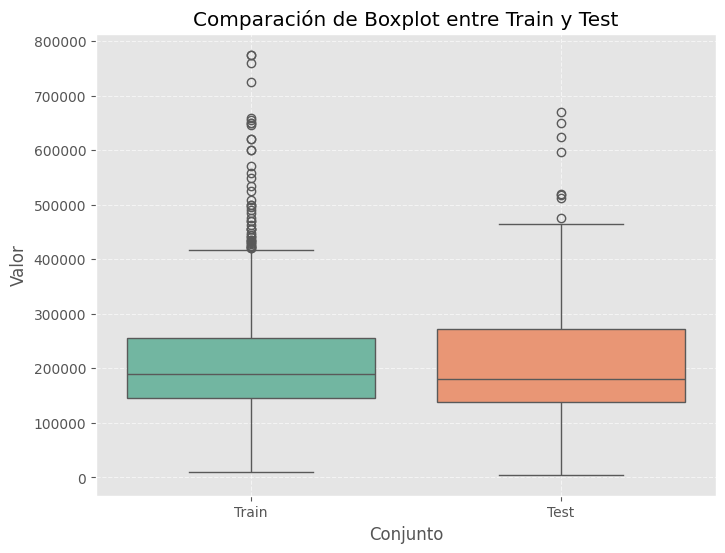

In [30]:
import seaborn as sns
import pandas as pd

# Combinar los datos en un DataFrame para Seaborn
df = pd.DataFrame({
    'Valor': y_train.tolist() + y_test.tolist(),
    'Conjunto': ['Train'] * len(y_train) + ['Test'] * len(y_test)
})

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Conjunto', y='Valor', data=df, palette='Set2')

# Configurar detalles de la gráfica
plt.title('Comparación de Boxplot entre Train y Test')
plt.ylabel('Valor')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Codificación y transformación adecuada de las variables

Es fundamental transformar correctamente las variables antes de entrenar un modelo de machine learning. Esto se debe a que los algoritmos suelen requerir un formato de entrada específico para funcionar correctamente. En este caso, aplicamos dos tipos de transformaciones: **escalado de variables numéricas** y **codificación de variables categóricas**.

#### **¿Por qué es importante hacer esto?**

1. **Escalado de variables numéricas:**  
   Las variables numéricas pueden tener diferentes rangos. Si no se escalan, las variables con rangos mayores podrían dominar el aprendizaje del modelo, afectando el rendimiento. Al aplicar el escalado con `StandardScaler()`, centramos los datos en una media de 0 y una desviación estándar de 1, mejorando la convergencia de algunos algoritmos como regresión lineal, k-means o redes neuronales.

2. **Codificación de variables categóricas:**  
   Los modelos de machine learning no pueden trabajar directamente con datos categóricos. Por lo tanto, es necesario convertir estas variables a un formato numérico. En este caso, se utiliza `OneHotEncoder()` para crear una columna binaria para cada categoría, permitiendo al modelo interpretar la información correctamente.

3. **Estandarización del flujo de trabajo:**  
   Utilizar un `ColumnTransformer` permite aplicar distintas transformaciones a diferentes tipos de variables en un solo paso, lo que mejora la reproducibilidad y el mantenimiento del código.


In [31]:
# Selección de las variables por tipo
# ==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

In [32]:
numeric_cols

['metros_habitables',
 'banyos',
 'precio_terreno',
 'Acres_totales',
 'habitaciones']

In [33]:
cat_cols

['chimenea',
 'categoria_antiguedad',
 'aire_acondicionado',
 'desague',
 'calefaccion',
 'consumo_calefacion']

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Configuración del preprocesador
preprocessor = ColumnTransformer(
    [
        # Primera transformación: Escalado de las variables numéricas
        # 'scale' es un nombre arbitrario para identificar esta transformación
        ('scale', StandardScaler(), numeric_cols),

        # Segunda transformación: Codificación de las variables categóricas (One-hot encoding)
        # 'onehot' es un nombre arbitrario para esta transformación
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    
    # Indica que las columnas que no se especifican en 'numeric_cols' o 'cat_cols'
    # deben mantenerse sin cambios (passthrough)
    remainder='passthrough',

    # Desactiva el agregado de prefijos en los nombres de las columnas de salida
    verbose_feature_names_out=False
).set_output(transform="pandas")  # Configura la salida para que sea un DataFrame de pandas

# ------------------------------------------------------------
# Aplicar el preprocesador a los datos de entrenamiento
# ------------------------------------------------------------
# El método fit_transform() ajusta el preprocesador a los datos de entrenamiento
# y luego transforma estos datos según las reglas definidas anteriormente.
X_train_prep = preprocessor.fit_transform(X_train)

# ------------------------------------------------------------
# Aplicar el preprocesador a los datos de prueba
# ------------------------------------------------------------
# El método transform() aplica las mismas transformaciones a los datos de prueba,
# utilizando los parámetros aprendidos en el conjunto de entrenamiento.
X_test_prep = preprocessor.transform(X_test)

# ------------------------------------------------------------
# Visualización de los primeros registros transformados
# ------------------------------------------------------------
# Muestra las primeras 3 filas de los datos preprocesados de entrenamiento.
X_train_prep.head(3)


,metros_habitables,banyos,precio_terreno,Acres_totales,habitaciones,chimenea_No tiene,chimenea_Tiene,categoria_antiguedad_Antigua,categoria_antiguedad_Media,categoria_antiguedad_Nueva,aire_acondicionado_No,aire_acondicionado_Yes,desague_public/commercial,desague_septic,calefaccion_electric,calefaccion_hot air,calefaccion_hot water/steam,consumo_calefacion_electric,consumo_calefacion_gas,consumo_calefacion_oil
1571,1.320467,0.905289,-0.195148,-0.061549,2.128665,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
832,0.194931,1.663079,-0.277982,-0.195573,1.264569,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1302,-0.064313,0.147500,-0.892092,0.072475,-0.463623,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_test_prep.head()

# Que guarda el procesador ?

### Para Variables numérica

In [ ]:
# Acceder al StandardScaler en el preprocesador
scaler = preprocessor.named_transformers_['scale']

# Mostrar la media y desviación estándar que ha aprendido el scaler
media = scaler.mean_
desviacion = scaler.scale_

print("Media aprendida por StandardScaler:")
print(pd.Series(media, index=numeric_cols))

print("\nDesviación estándar aprendida por StandardScaler:")
print(pd.Series(desviacion, index=numeric_cols))

## Para Variables Categóricas

In [ ]:
# Acceder al OneHotEncoder en el preprocesador
encoder = preprocessor.named_transformers_['onehot']

# Mostrar las categorías detectadas para cada variable categórica
print("Categorías aprendidas por OneHotEncoder:")
for col, categories in zip(cat_cols, encoder.categories_):
    print(f"{col}: {categories}")

# Diagrama de cada paso aplicado

In [ ]:
from sklearn import set_config
set_config(display='diagram')

preprocessor

# Guardar el codificador para nuevos casos

In [ ]:
# Importar la biblioteca para guardar y cargar objetos
import joblib

# -------------------------------
# Guardar el preprocesador
# -------------------------------
# Guardar el preprocesador en un archivo .pkl
joblib.dump(preprocessor, 'preprocessor_saratoga.pkl')

print("Preprocesador guardado exitosamente en 'preprocessor_saratoga.pkl'.")

In [ ]:
# Cargar el preprocesador guardado
loaded_preprocessor = joblib.load('preprocessor_saratoga.pkl')

In [ ]:
# Simulación de nuevos datos (puedes reemplazarlo con datos reales)
# Simulación de nuevos datos
nuevos_datos = pd.DataFrame({
    'metros_habitables': [1000, 1800],
    'banyos': [1.5, 2.0],
    'precio_terreno': [12000, 25000],
    'Acres_totales': [0.12, 0.5],
    'habitaciones': [4, 5],
    'chimenea': ['No tiene', 'Tiene'],
    'categoria_antiguedad': ['Media', 'Nueva'],
    'aire_acondicionado': ['No', 'Yes'],
    'desague': ['public/commercial', 'septic'],
    'calefaccion': ['hot air', 'electric'],
    'consumo_calefacion': ['gas', 'electric']
})

# Aplicar el preprocesador cargado a los nuevos datos
nuevos_datos_prep = loaded_preprocessor.transform(nuevos_datos)

# Mostrar los primeros registros de los datos transformados
print("Datos transformados:")
nuevos_datos_prep.head()

In [ ]:
import session_info
session_info.show(html=False)